In [30]:
import numpy as np
import pandas as pd

import pickle
import scipy
import scipy.sparse as sp

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [31]:
INPUT_DATA_FOLDER = "final_data"

MODEL_FOLDER = "model"

In [32]:
X_test = pickle.load(open(f"{MODEL_FOLDER}/X_test.pkl", "rb"))

y_test = pickle.load(open(f"{MODEL_FOLDER}/y_test.pkl", "rb"))

In [33]:
def plot_confusion_matrix(clf, y_test, predicted):
    classes = clf.classes_
    classes[0], classes[1] = classes[1], classes[0]

    cm = confusion_matrix(y_test, predicted, labels=classes)
    cm = cm.T

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot()
    plt.show()

def evaluate_classification(y_test, predicted):
    accuracy = accuracy_score(y_test, predicted)
    precision = precision_score(y_test, predicted)
    recall = recall_score(y_test, predicted)
    f1 = f1_score(y_test, predicted)

    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F-measure: ", f1)



Analysis of models trained using 80/20 distribution

Recall (повнота) = TP / (TP + FN)

Показник, який показує, яку частку об'єктів позитивного класу алгоритм правильно визначив

Precision(точність) =  TP / (TP + FP)

Показник, який показує, яку частку об'єктів, що алгоритм визначив як позитивні, дійсно є позитивними

F-measure(гармонійне середнє між Recall і Precision) =  2 * (Precision * Recall) / (Precision + Recall)

In [34]:
clf1 = pickle.load(open(f"{MODEL_FOLDER}/8_random_forest_v2.pkl", "rb"))

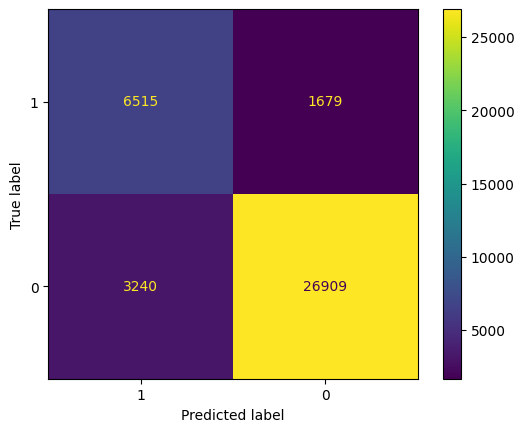

In [35]:
predicted1 = clf1.predict(X_test)

plot_confusion_matrix(clf1, y_test, predicted1)

In [36]:
print("Random forest v2")
evaluate_classification(y_test, predicted1)

Random forest v2
Accuracy:  0.8717106121065122
Precision:  0.7950939711984378
Recall:  0.6678626345463865
F-measure:  0.7259457351384478


In [37]:
clf2 = pickle.load(open(f"{MODEL_FOLDER}/8_SGD_v1.pkl", "rb"))

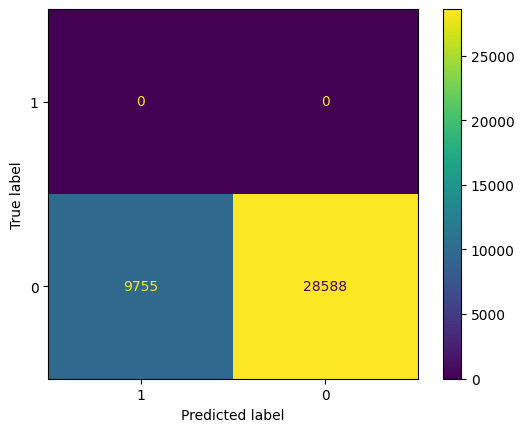

In [38]:
predicted2 = clf2.predict(X_test)

plot_confusion_matrix(clf2, y_test, predicted2)

In [39]:
print("Stochastic Gradient Descent v1")
evaluate_classification(y_test, predicted2)

 Stochastic Gradient Descent v1
Accuracy:  0.7455858957306418
Precision:  0.0
Recall:  0.0
F-measure:  0.0


c:\Users\Danyil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
clf3 = pickle.load(open(f"{MODEL_FOLDER}/8_logistic_regression_v4.pkl", "rb"))

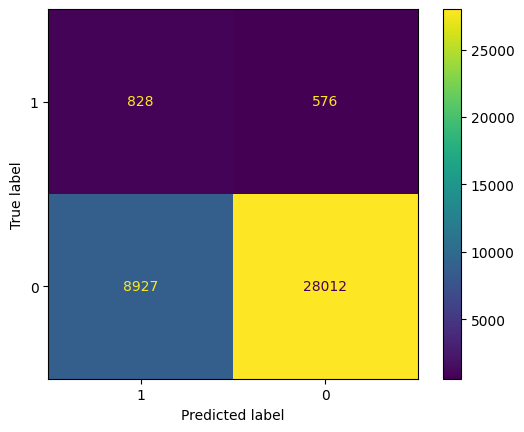

In [41]:
predicted3 = clf3.predict(X_test)

plot_confusion_matrix(clf3, y_test, predicted3)

In [42]:
print("Logistic regression v4")
evaluate_classification(y_test, predicted3)

Logistic regression v4
Accuracy:  0.7521581514226847
Precision:  0.5897435897435898
Recall:  0.0848795489492568
F-measure:  0.1484003943005646


In [11]:
# indices = range(0, X_test.shape[0], 4)
# rows = [X_test.getrow(idx) for idx in indices]

# X_test_quarter = sp.vstack(rows)

# y_test_quarter = y_test[::4]

In [12]:
# X_test_quarter.shape

In [13]:
# y_test_quarter.shape

In [15]:
# with open(f"{MODEL_FOLDER}/X_test_quarter.pkl", 'wb') as handle:
#     pickle.dump(X_test, handle)

# with open(f"{MODEL_FOLDER}/y_test_quarter.pkl", 'wb') as handle:
#     pickle.dump(y_test, handle)

In [16]:
# X_test_quarter = pickle.load(open(f"{MODEL_FOLDER}/X_test_quarter.pkl", "rb"))

# y_test_quarter = pickle.load(open(f"{MODEL_FOLDER}/y_test_quarter.pkl", "rb"))

In [5]:
# clf4 = pickle.load(open(f"{MODEL_FOLDER}/8_svc_v1.pkl", "rb"))
# predicted4 = clf4.predict(X_test_quarter)

# plot_confusion_matrix(clf4, y_test_quarter, predicted4)

In [ ]:
# print("Support Vector Machines v1")
# evaluate_classification(y_test_quarter, predicted4)

In [43]:
names_of_columns = np.array(['day_tempmax', 'day_tempmin', 'day_temp', 'day_dew', 'day_humidity',
       'day_precip', 'day_precipcover', 'day_solarradiation',
       'day_solarenergy', 'day_uvindex', 'day_moonphase', 'hour_temp',
       'hour_humidity', 'hour_dew', 'hour_precip', 'hour_precipprob',
       'hour_snow', 'hour_snowdepth', 'hour_windgust', 'hour_windspeed',
       'hour_winddir', 'hour_pressure', 'hour_visibility', 'hour_cloudcover',
       'hour_solarradiation', 'hour_uvindex', 'hour_severerisk', 'region_id_x',
        'region_id_y', 'hour_conditions_id'])

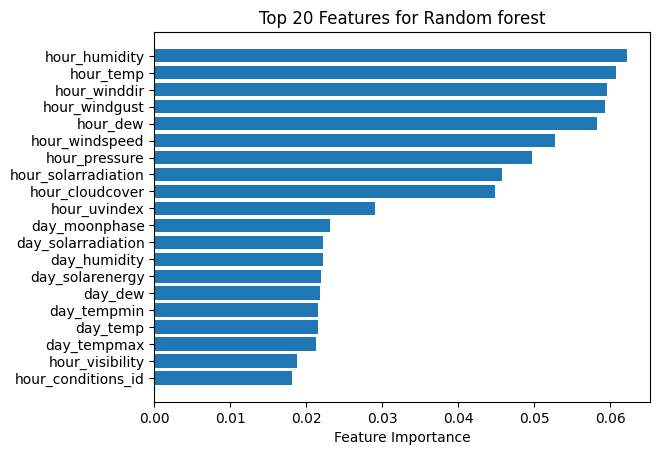

In [45]:
importances = clf1.feature_importances_

indices = np.argsort(importances)[::-1]

top_features = names_of_columns[indices[:20]]
top_weights = importances[indices][:20]

fig, ax = plt.subplots()
ax.barh(top_features, top_weights)

ax.set_title("Top 20 Features for Random forest")
ax.set_xlabel("Feature Importance")

ax.invert_yaxis()

plt.show()

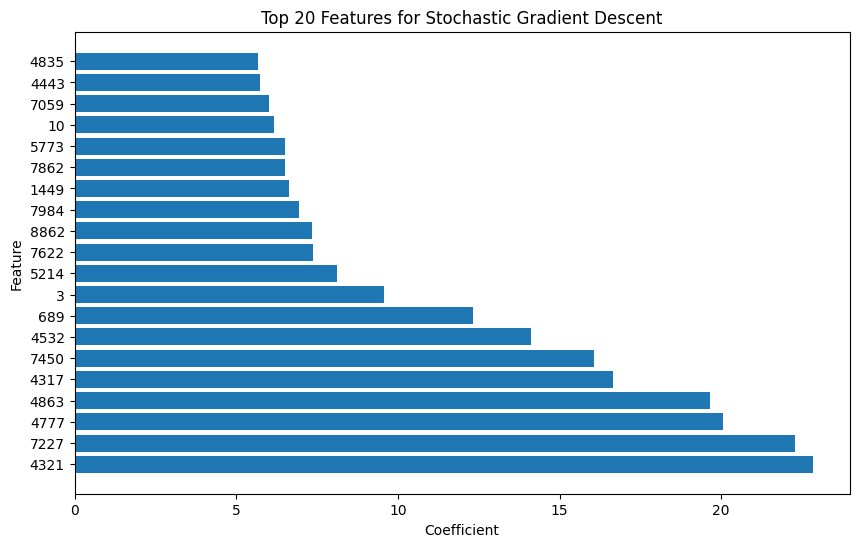

In [46]:
coef = clf2.coef_[0]

top20_indices = np.argsort(coef)[::-1][:20]
top20_coef = coef[top20_indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(top20_coef)), top20_coef)
plt.yticks(range(len(top20_coef)), top20_indices)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 20 Features for Stochastic Gradient Descent')
plt.show()

In [47]:
cv = pickle.load(open(f"{MODEL_FOLDER}/count_vectorizer_v1.pkl", "rb"))

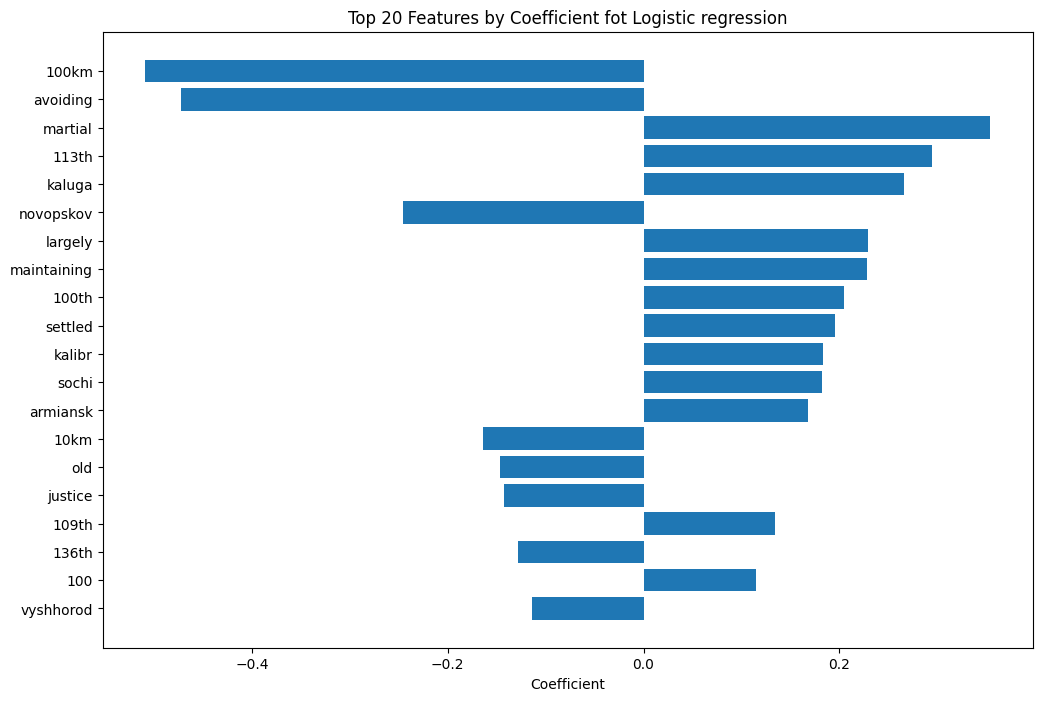

In [48]:
coef = clf3.coef_[0]

feature_coef = dict(zip(cv.get_feature_names_out(), coef))

sorted_feature_coef = sorted(feature_coef.items(), key=lambda x: abs(x[1]), reverse=True)

top_features = []
top_weights = []
for feature, coef in sorted_feature_coef[:20]:
    top_features.append(feature)
    top_weights.append(coef)

fig, ax = plt.subplots(figsize=(12,8))
ax.barh(np.arange(len(top_features)), top_weights, align='center')
ax.set_yticks(np.arange(len(top_features)))
ax.set_yticklabels(top_features)
ax.invert_yaxis()  
ax.set_xlabel('Coefficient')
ax.set_title('Top 20 Features by Coefficient fot Logistic regression')
plt.show()